<a href="https://colab.research.google.com/github/ochamodev/lab1_sl2_19001395_v/blob/main/Lab1_SL2_19001395_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



# 1. Exploring and visualizing data

![alt text](sections/sec1.png)

## Reading and merging dataset

In [14]:
part1 = pd.read_parquet('./creditcard_part_1.parquet')
part2 = pd.read_parquet('./creditcard_part_2.parquet')
part3 = pd.read_parquet('./creditcard_part_3.parquet')
part4 = pd.read_parquet('./creditcard_part_4.parquet')

dataframes = [part1, part2, part3, part4]

dataframe = pd.concat(dataframes)

## Checking missing values

In [15]:
sumOfNulls = dataframe.isnull().sum()
print(f"Amount of null in dataset {sumOfNulls}")

print(f"Datatypes in dataset: {dataframe.dtypes}")

Amount of null in dataset Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Datatypes in dataset: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: ob

## Distribution of variables

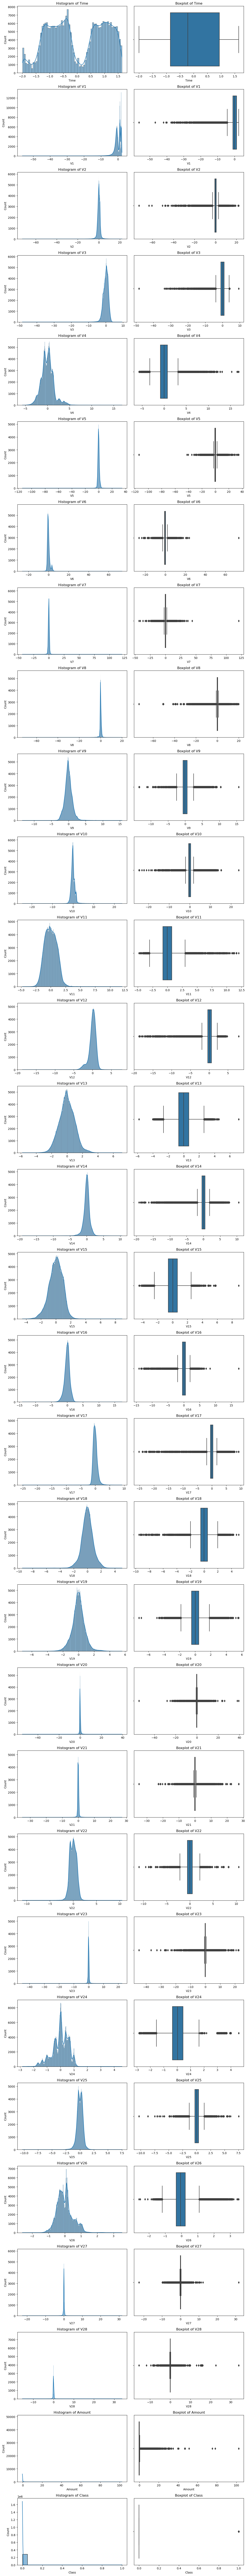

In [16]:
fig, axes = plt.subplots(nrows=len(dataframe.columns), ncols=2, figsize=(12, len(dataframe.columns) * 4))

for i, column in enumerate(dataframe.columns):
  sns.histplot(dataframe[column], kde=True, ax=axes[i, 0])
  axes[i, 0].set_title(f'Histogram of {column}')

  sns.boxplot(x=dataframe[column], ax=axes[i, 1])
  axes[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [17]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Class count

In [18]:
print(dataframe.Class.value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


# Preprocessing

![alt text](sections/sec2.png)

## Splitting independent and dependent variables

In [19]:
y = dataframe['Class']
x = dataframe.drop(['Class'], axis = 1)

numeric_features = ['Amount']

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


x_train_transformed = pipeline.fit_transform(x_train)
x_test_transformed = pipeline.fit_transform(x_test)


# 3. Supervised models
![alt text](sections/sec3.png)

In [26]:
model = LogisticRegression(n_jobs=4)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("reporte")
print(report)
print(confusion_matrix)

reporte
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

[[56855     9]
 [   41    57]]


We can notice the metrics are perfect for predicting the non fraud transaction, but performs badly for the other ones. And our focus is on detecting fraud.

# 4. Sampling techniques

![alt text](sections/sec4.png)